In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
explicativas = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
                '90-94', '95-99', '100+', 'POPULACAO', 'URBANIZACAO', 'GINI',
                'GASTOS_SAUDE', 'EXPECTATIVA_VIDA', 'DENSIDADE_MEDICOS',
                'DENSIDADE_LEITOS_POR_MIL']

dependente = ['LETALIDADE']

numericas = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
             '90-94', '95-99', '100+', 'POPULACAO', 'URBANIZACAO', 'GINI',
             'GASTOS_SAUDE', 'EXPECTATIVA_VIDA', 'DENSIDADE_MEDICOS',
             'DENSIDADE_LEITOS_POR_MIL', 'LETALIDADE']

retiradas = ['CASOS', 'MORTES', 'CASOS_POR_MILHAO', 'MORTES_POR_MILHAO']

grupos_etarios = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
                  '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
                  '80-84', '85-89', '90-94', '95-99', '100+']

df = pd.read_csv('data/consolidadoWHO.csv', sep = ',')

df['LETALIDADE'] = df.MORTES / df.CASOS

df.drop(axis='columns', columns=retiradas, inplace=True)
    
df.LETALIDADE.mean()

0.02004375690516171

In [38]:
df.describe()

,AREA,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,95-99,100+,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL,LETALIDADE
count,1.950000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,...,194.000000,194.000000,1.940000e+02,193.000000,165.000000,188.000000,193.000000,189.000000,175.000000,187.000000
mean,6.627831e+05,3.444873e+06,3.340523e+06,3.214672e+06,3.068355e+06,3.014063e+06,3.001501e+06,3.032181e+06,2.751037e+06,2.515105e+06,...,21691.118557,3482.237113,3.939759e+07,0.596927,38.189091,0.065862,73.510155,1.855873,2.988000,0.020044
std,1.834234e+06,1.101348e+07,1.082511e+07,1.066149e+07,1.050662e+07,1.076206e+07,1.106652e+07,1.195679e+07,1.028240e+07,9.555439e+06,...,79160.035533,14185.134559,1.432352e+08,0.230846,7.523646,0.028977,7.046312,1.691308,2.409828,0.019481
min,0.000000e+00,8.870000e+02,8.490000e+02,9.100000e+02,8.380000e+02,7.620000e+02,7.160000e+02,9.770000e+02,7.300000e+02,5.290000e+02,...,0.000000,0.000000,9.785000e+03,0.135000,24.200000,0.016000,53.250000,0.010000,0.100000,0.000000
25%,2.299500e+04,1.284750e+05,1.296988e+05,1.245998e+05,1.248310e+05,1.468092e+05,1.529948e+05,1.606285e+05,1.446870e+05,1.173065e+05,...,253.500000,17.500000,2.002670e+06,0.420000,33.000000,0.045000,69.010000,0.360000,1.300000,0.009756
50%,1.127600e+05,6.381420e+05,6.528065e+05,6.161645e+05,5.846575e+05,5.642390e+05,6.117570e+05,6.045415e+05,5.864005e+05,5.171915e+05,...,1243.000000,96.500000,8.641960e+06,0.599000,36.800000,0.063000,75.030000,1.450000,2.400000,0.016188
75%,5.194300e+05,2.732320e+06,2.775891e+06,2.679946e+06,2.476000e+06,2.386279e+06,2.256426e+06,2.017978e+06,1.774525e+06,1.560189e+06,...,8621.250000,1098.250000,2.916634e+07,0.783000,42.800000,0.082250,78.140000,2.920000,4.200000,0.025166
max,1.637687e+07,1.163208e+08,1.161343e+08,1.164066e+08,1.168587e+08,1.153046e+08,1.092246e+08,1.261914e+08,9.947918e+07,9.248426e+07,...,673178.000000,140585.000000,1.394016e+09,1.000000,63.000000,0.191000,89.400000,8.420000,13.800000,0.196078


In [39]:
def index_mean(data : pd.DataFrame, pais : str, indice : str):
    regiao = data.loc[data['PAIS'] == pais, 'SUB_REGIAO'].values[0]
    mean = data.query(f"SUB_REGIAO == '{regiao}'")[indice].mean()
    return mean


In [40]:
def full_na_with_mean(data : pd.DataFrame, indice : str): 
    dfNA = data[data[indice].isna()]
    dfNA.index = range(dfNA.shape[0])

    for i in range(dfNA.shape[0]) :
      pais = dfNA.PAIS.loc[i]
      indice_value = index_mean(data, pais, indice)
      data.loc[data['PAIS'] == pais, indice] = indice_value    

In [41]:
full_na_with_mean(df, 'GINI')
full_na_with_mean(df, 'GASTOS_SAUDE')
full_na_with_mean(df, 'EXPECTATIVA_VIDA')
full_na_with_mean(df, 'DENSIDADE_MEDICOS')
full_na_with_mean(df, 'DENSIDADE_LEITOS_POR_MIL')
full_na_with_mean(df, 'URBANIZACAO')

df.dropna(inplace=True)


In [42]:
df.isna().sum() 

AREA                        0
PAIS                        0
CONTINENTE                  0
SUB_REGIAO                  0
ISO                         0
0-4                         0
5-9                         0
10-14                       0
15-19                       0
20-24                       0
25-29                       0
30-34                       0
35-39                       0
40-44                       0
45-49                       0
50-54                       0
55-59                       0
60-64                       0
65-69                       0
70-74                       0
75-79                       0
80-84                       0
85-89                       0
90-94                       0
95-99                       0
100+                        0
POPULACAO                   0
URBANIZACAO                 0
GINI                        0
GASTOS_SAUDE                0
EXPECTATIVA_VIDA            0
DENSIDADE_MEDICOS           0
DENSIDADE_LEITOS_POR_MIL    0
LETALIDADE

In [43]:
df.describe()

,AREA,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,95-99,100+,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL,LETALIDADE
count,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,...,186.000000,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,6.916647e+05,3.580541e+06,3.472180e+06,3.341108e+06,3.187947e+06,3.130571e+06,3.116541e+06,3.149509e+06,2.857595e+06,2.612839e+06,...,22596.451613,3630.225806,4.092256e+07,0.597790,38.355284,0.064183,73.584946,1.887324,2.887832,0.020152
std,1.873195e+06,1.122845e+07,1.103692e+07,1.087103e+07,1.071440e+07,1.097644e+07,1.128811e+07,1.219815e+07,1.048851e+07,9.747338e+06,...,80729.238789,14470.143358,1.460951e+08,0.229518,7.310178,0.026725,7.133158,1.707834,2.376071,0.019477
min,1.000000e+00,8.870000e+02,8.490000e+02,1.176000e+03,1.476000e+03,1.468000e+03,1.342000e+03,1.328000e+03,1.171000e+03,1.406000e+03,...,9.000000,1.000000,3.094000e+04,0.135000,24.200000,0.016000,53.250000,0.010000,0.100000,0.000000
25%,2.744000e+04,1.888798e+05,1.875590e+05,1.714068e+05,1.815992e+05,1.857952e+05,1.974660e+05,1.791220e+05,1.670810e+05,1.489950e+05,...,293.500000,19.000000,2.252489e+06,0.421500,33.187500,0.045000,69.125000,0.362500,1.300000,0.009816
50%,1.295350e+05,7.712135e+05,7.546965e+05,6.866580e+05,6.343635e+05,6.305415e+05,6.465705e+05,6.269345e+05,6.119120e+05,5.407415e+05,...,1323.000000,114.500000,9.054504e+06,0.600000,37.050000,0.062000,75.180000,1.555000,2.212500,0.016232
75%,5.619368e+05,3.036254e+06,2.902559e+06,2.738176e+06,2.573466e+06,2.551931e+06,2.316528e+06,2.187157e+06,1.851288e+06,1.642716e+06,...,9571.500000,1152.750000,3.004475e+07,0.782750,42.787500,0.079500,78.280000,2.975000,3.800000,0.025210
max,1.637687e+07,1.163208e+08,1.161343e+08,1.164066e+08,1.168587e+08,1.153046e+08,1.092246e+08,1.261914e+08,9.947918e+07,9.248426e+07,...,673178.000000,140585.000000,1.394016e+09,1.000000,63.000000,0.176000,89.400000,8.420000,13.800000,0.196078


In [44]:
data = df[numericas].values[:, :-1]
trans = StandardScaler()
data = trans.fit_transform(data)
dataset_explicativas = pd.DataFrame(data)
dataset_explicativas.columns = explicativas
dataset_explicativas

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,90-94,95-99,100+,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL
0,7.077195,7.000751,6.859970,6.674039,7.524658,8.725672,10.114161,9.237000,9.244985,10.617280,...,7.808508,4.321466,1.494663,9.286730,0.118872,0.019850,-0.382061,0.383057,0.054412,0.595933
1,10.067690,10.235296,10.428701,10.637788,10.247114,9.425353,8.160835,8.949252,8.954028,7.589449,...,2.337172,1.021359,0.233229,8.820553,-1.065053,-0.364211,-1.094938,-0.499714,-0.603160,-1.007662
2,1.505417,1.519751,1.607568,1.670517,1.714542,1.811685,1.630037,1.822553,1.832812,1.669572,...,6.539152,7.774929,6.127960,2.002148,1.010092,0.376478,3.932721,0.962201,0.424296,-0.163664
3,1.508948,1.610664,1.726379,1.808500,1.745124,1.548611,1.349243,1.614572,1.752645,1.549747,...,0.742697,0.252032,0.131574,1.551826,-0.108302,-0.076165,-1.320057,-0.107528,-0.855620,-0.796663
4,2.339448,2.250617,2.094595,1.926493,1.659649,1.409101,1.108615,1.088709,0.975076,0.723257,...,-0.030153,-0.164068,-0.214274,1.321727,-0.977678,-0.665974,-1.207497,-0.592490,-0.532706,-0.965462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,-0.318974,-0.314669,-0.307384,-0.297609,-0.285334,-0.276374,-0.258349,-0.272590,-0.268319,-0.241312,...,-0.301457,-0.280548,-0.251485,-0.280330,0.804761,0.239314,4.195359,0.111760,-0.861491,-0.079265
182,-0.319431,-0.315114,-0.307842,-0.298013,-0.285637,-0.276500,-0.258568,-0.272795,-0.268359,-0.241288,...,-0.301040,-0.280076,-0.250792,-0.280496,-1.261646,0.602800,-0.419581,0.456153,0.465394,0.806933
183,-0.319663,-0.315369,-0.308062,-0.298203,-0.285844,-0.276717,-0.258783,-0.273073,-0.268636,-0.241468,...,-0.299626,-0.275642,-0.232221,-0.280653,1.757144,-1.014764,-1.807814,2.223102,3.301171,4.604922
184,-0.319563,-0.315263,-0.307992,-0.298146,-0.285765,-0.276624,-0.258692,-0.272943,-0.268523,-0.241389,...,-0.300833,-0.279604,-0.250653,-0.280597,-1.978117,-1.014764,0.973343,1.233498,1.401112,1.608731


In [45]:
dfCorr = df[numericas].corr()

In [46]:
dfCorr

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,95-99,100+,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL,LETALIDADE
0-4,1.000000,0.999329,0.997147,0.993588,0.989484,0.975634,0.942235,0.958544,0.954532,0.913514,...,0.321699,0.145790,0.964911,-0.108708,-0.007523,-0.121285,-0.106216,-0.130157,-0.122799,0.102099
5-9,0.999329,1.000000,0.999144,0.996780,0.993098,0.979068,0.944918,0.962944,0.959437,0.916987,...,0.327476,0.151871,0.967822,-0.099764,-0.009877,-0.116100,-0.093063,-0.120646,-0.114125,0.099129
10-14,0.997147,0.999144,1.000000,0.999137,0.995522,0.980585,0.944832,0.965029,0.962113,0.917701,...,0.333396,0.158568,0.968566,-0.092120,-0.009888,-0.108596,-0.080939,-0.112468,-0.108687,0.094240
15-19,0.993588,0.996780,0.999137,1.000000,0.996492,0.980326,0.942383,0.964816,0.962468,0.915756,...,0.335734,0.162443,0.967039,-0.085080,-0.009795,-0.100916,-0.068363,-0.104932,-0.104338,0.090105
20-24,0.989484,0.993098,0.995522,0.996492,1.000000,0.993007,0.965551,0.982327,0.980703,0.944691,...,0.358921,0.175112,0.983580,-0.070593,-0.011983,-0.088114,-0.047578,-0.089856,-0.085689,0.092123
25-29,0.975634,0.979068,0.980585,0.980326,0.993007,1.000000,0.989184,0.996811,0.995605,0.975796,...,0.389556,0.190623,0.997191,-0.052215,-0.013004,-0.071952,-0.026165,-0.071446,-0.061743,0.096289
30-34,0.942235,0.944918,0.944832,0.942383,0.965551,0.989184,1.000000,0.995397,0.994619,0.995994,...,0.410298,0.197264,0.995257,-0.033902,-0.011879,-0.060340,-0.009191,-0.051919,-0.033575,0.101472
35-39,0.958544,0.962944,0.965029,0.964816,0.982327,0.996811,0.995397,1.000000,0.999631,0.987577,...,0.417522,0.212406,0.998523,-0.029495,-0.014981,-0.056420,-0.003237,-0.050353,-0.032421,0.093300
40-44,0.954532,0.959437,0.962113,0.962468,0.980703,0.995605,0.994619,0.999631,1.000000,0.988583,...,0.427673,0.223339,0.997912,-0.022644,-0.018729,-0.051094,0.006680,-0.043049,-0.023334,0.091489
45-49,0.913514,0.916987,0.917701,0.915756,0.944691,0.975796,0.995994,0.987577,0.988583,1.000000,...,0.446525,0.230836,0.986921,-0.010423,-0.019639,-0.039133,0.021320,-0.028019,0.000095,0.095980


<AxesSubplot:>

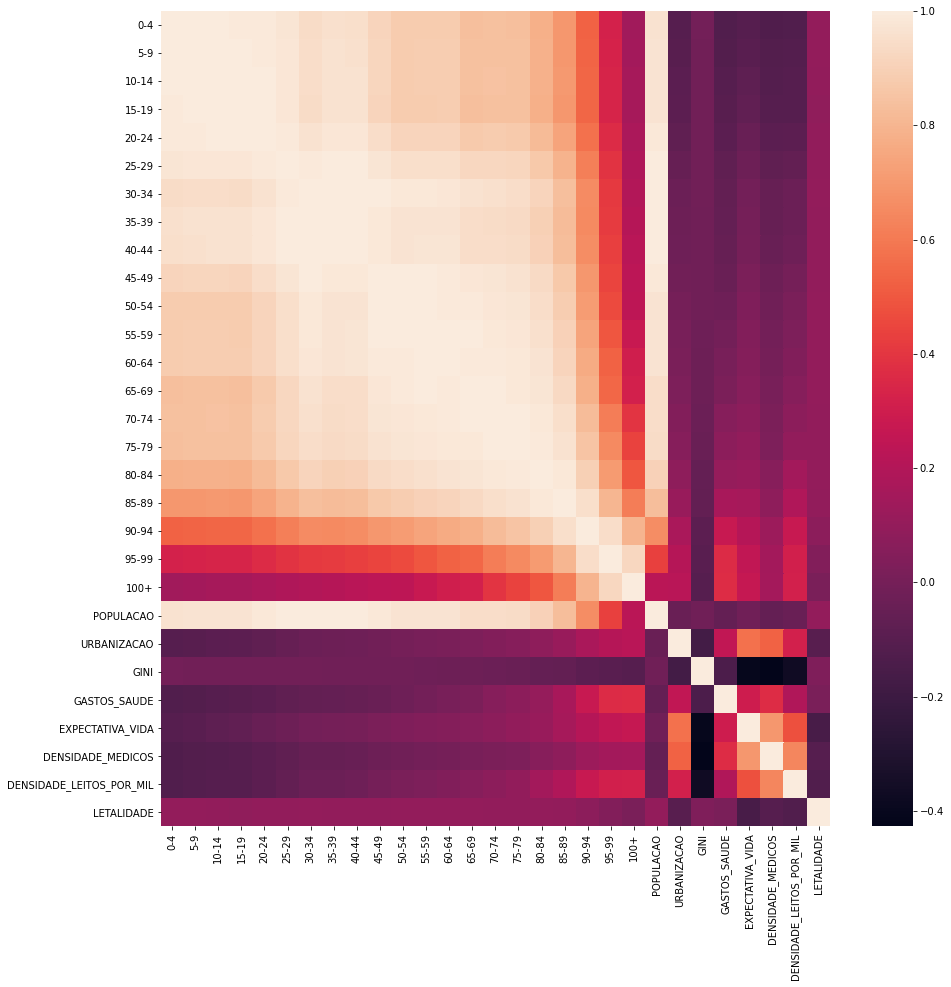

In [47]:
fig, ax0 = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(dfCorr, ax=ax0)

In [48]:
dataset_explicativas.corr()

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,90-94,95-99,100+,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL
0-4,1.000000,0.999329,0.997147,0.993588,0.989484,0.975634,0.942235,0.958544,0.954532,0.913514,...,0.530775,0.321699,0.145790,0.964911,-0.108708,-0.007523,-0.121285,-0.106216,-0.130157,-0.122799
5-9,0.999329,1.000000,0.999144,0.996780,0.993098,0.979068,0.944918,0.962944,0.959437,0.916987,...,0.536229,0.327476,0.151871,0.967822,-0.099764,-0.009877,-0.116100,-0.093063,-0.120646,-0.114125
10-14,0.997147,0.999144,1.000000,0.999137,0.995522,0.980585,0.944832,0.965029,0.962113,0.917701,...,0.539897,0.333396,0.158568,0.968566,-0.092120,-0.009888,-0.108596,-0.080939,-0.112468,-0.108687
15-19,0.993588,0.996780,0.999137,1.000000,0.996492,0.980326,0.942383,0.964816,0.962468,0.915756,...,0.539310,0.335734,0.162443,0.967039,-0.085080,-0.009795,-0.100916,-0.068363,-0.104932,-0.104338
20-24,0.989484,0.993098,0.995522,0.996492,1.000000,0.993007,0.965551,0.982327,0.980703,0.944691,...,0.573803,0.358921,0.175112,0.983580,-0.070593,-0.011983,-0.088114,-0.047578,-0.089856,-0.085689
25-29,0.975634,0.979068,0.980585,0.980326,0.993007,1.000000,0.989184,0.996811,0.995605,0.975796,...,0.619585,0.389556,0.190623,0.997191,-0.052215,-0.013004,-0.071952,-0.026165,-0.071446,-0.061743
30-34,0.942235,0.944918,0.944832,0.942383,0.965551,0.989184,1.000000,0.995397,0.994619,0.995994,...,0.658066,0.410298,0.197264,0.995257,-0.033902,-0.011879,-0.060340,-0.009191,-0.051919,-0.033575
35-39,0.958544,0.962944,0.965029,0.964816,0.982327,0.996811,0.995397,1.000000,0.999631,0.987577,...,0.653197,0.417522,0.212406,0.998523,-0.029495,-0.014981,-0.056420,-0.003237,-0.050353,-0.032421
40-44,0.954532,0.959437,0.962113,0.962468,0.980703,0.995605,0.994619,0.999631,1.000000,0.988583,...,0.661736,0.427673,0.223339,0.997912,-0.022644,-0.018729,-0.051094,0.006680,-0.043049,-0.023334
45-49,0.913514,0.916987,0.917701,0.915756,0.944691,0.975796,0.995994,0.987577,0.988583,1.000000,...,0.694112,0.446525,0.230836,0.986921,-0.010423,-0.019639,-0.039133,0.021320,-0.028019,0.000095


In [49]:
#X = dataset_explicativas
X = df[numericas].values[:, :-1]
y = df[dependente]

In [50]:
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = np.ravel(y_train)

models = [DummyRegressor(), DecisionTreeRegressor(), LinearRegression(), 
          SVR(), GaussianProcessRegressor(), RandomForestRegressor(), 
          ExtraTreesRegressor(), GradientBoostingRegressor(), AdaBoostRegressor()]

for model in models :
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test), np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    



-0.010086038713287726 0.01768435464940936
-0.12284584039221769 0.018645331057573947
-3.802358331097034 0.03856002552370015
-20.19096832784107 0.08100007720846925
-1.1627102863513796 0.025876718690896992
-0.20044589687058845 0.019278859016645576
-0.11637637422819602 0.01859153934938645
-0.2925968744073484 0.020005139417849403
0.04547164437309492 0.01719113096176085
